# Preparación Data Final para Modelar

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sys
import matplotlib


# Manejo de fechas
import datetime
import matplotlib.dates as mdates
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn import metrics

pd.set_option('display.max_columns', None)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#from sklearn.externals import joblib
from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

## Datos

In [2]:
#header_list=["cliente_id","no_documento","tipo_documento","nombre_completo_cliente","nombre_cliente","primer_apellido_cliente","segundo_apellido_cliente","email_cliente","tlf_principal","tlf_celular","tlf_domicilio","tlf_empresa","tlf_otro","fecha_nacimiento_cliente","genero_cliente","estado_civil_cliente","direccion_domicilio","empresa","direccion_empresa","cargo","profesion","fecha_ultima_actualizacion","fuente_ultima_actualizacion","ciudad_cliente","segmento_cliente","sueldo_cliente","tipo_empleado","cargas_familiares_cliente","nombre","fullDate","Tiempo","fase","gestion","tipo_gestion","subtipo_gestion","subtipo_gestion1","gestion_gxc_id","tipo_gestion_gxc_id","subtipo_gestion_gxc_id","categoria","fuente_gxc","gestion_gxc_estatus","tipo_gestion_gxc_estatus","subtipo_gestion_gxc_estatus","gestionado","contactado","contactabilidad_efectiva","ganada","perdida","no_perfil","indeciso","agente_id","usuario_agente","primer_apellido_agente","segundo_apellido","nombres_agente","cedula_agente","fecha_de_nacimiento_agente","edad_agente","estado_civil_agente","numero_de_hijos_agente","nivel_de_estudios_culminados_agente","celular_agente","correo_agente","direccion_agente","promedio_de_ingresos_agente"]

In [3]:
df1= pd.read_csv('../sintetic_ds.csv', sep=",")
df2= pd.read_csv('../sintetic_ds2.csv', sep=",")
df3= pd.read_csv('../sintetic_ds_test_new.csv', sep=",")

df = pd.concat([df1,df2] , ignore_index=True)

#df= pd.read_csv('./sintetic_ds.csv', sep=";", header=None, names=header_list)
df.head()

,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,crop,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,Unnamed: 25,N,P,K,No,Po,Ko,leaf_att,stem_att,store_att,SeasonLength,leaf_lim,stem_lim,store_lim,N_supply,P_supply,K_supply,N_uptake,P_uptake,K_uptake,N_gap,P_gap,K_gap
0,4.7,21,30,1.5,1.1,63.8,1.7,21.2,0.7,0.17,0.7,3810,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,6779.22444,230,130,130,0,0,0,3264.08034,3515.1441,3713.394876,240,3264.1,3515.1,3152.1,212.1,22.5,105.8,195.8,22.0,97.8,159.3,10.7,0.0
1,5.7,21,20,1.7,1.1,67.5,5.3,29.2,0.7,0.17,0.7,5210,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,9270.27804,200,50,310,0,0,0,4463.47994,4806.7981,4262.349226,240,4463.5,4806.8,2881.2,207.1,13.8,245.8,175.7,13.7,138.4,331.8,112.6,0.0
2,5.1,21,21,1.5,1.1,55.1,3.7,28.0,0.7,0.17,0.7,3090,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,5498.11116,550,80,310,0,0,0,2647.24626,2850.8649,3386.065776,240,2647.2,2850.9,3185.0,375.9,14.8,209.2,265.1,14.8,139.2,0.0,29.6,0.0
3,5.9,21,25,0.3,1.1,90.6,6.8,3.9,0.7,0.17,0.7,4050,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,7206.26220,460,130,80,0,0,0,3469.69170,3736.5705,3815.710656,240,3469.7,3736.6,3285.6,397.7,27.9,57.7,292.9,25.2,57.0,0.0,0.0,0.0
4,5.3,21,10,1.1,1.1,28.8,2.4,41.4,0.7,0.17,0.7,6300,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,11209.74120,280,40,50,0,0,0,5397.29820,5812.4430,4609.717375,240,5397.3,5812.4,1784.7,209.6,8.6,71.2,150.7,8.6,58.9,456.6,182.7,0.0


In [4]:
#TO_KEEP=['PH', 'SOC', 'KEX', 'PBRAY', 'NrTrees', 'N', 'P', 'K', 'store_att', 'N_supply']
#df = df[TO_KEEP]

df.drop(columns=['No', 'Po', 'Ko', 'Unnamed: 25','P_supply',
 'K_supply',
 'N_uptake',
 'P_uptake',
 'K_uptake',
 'N_gap',
 'P_gap',
 'K_gap',
'leaf_lim',
 'stem_lim',
 'store_lim','crop'], inplace=True)

df.columns.tolist()


['PH',
 'TEMP',
 'SOC',
 'KEX',
 'PBRAY',
 'N_base_supply',
 'P_base_supply',
 'K_base_supply',
 'N_recovery',
 'P_recovery',
 'K_recovery',
 'NrTrees',
 'NminStore',
 'NminVeg',
 'NmaxStore',
 'NmaxVeg',
 'PminStore',
 'PminVeg',
 'PmaxStore',
 'PmaxVeg',
 'KminStore',
 'KminVeg',
 'KmaxStore',
 'KmaxVeg',
 'N',
 'P',
 'K',
 'leaf_att',
 'stem_att',
 'store_att',
 'SeasonLength',
 'N_supply']

In [5]:
df.count()

PH               15000
TEMP             15000
SOC              15000
KEX              15000
PBRAY            15000
N_base_supply    15000
P_base_supply    15000
K_base_supply    15000
N_recovery       15000
P_recovery       15000
K_recovery       15000
NrTrees          15000
NminStore        15000
NminVeg          15000
NmaxStore        15000
NmaxVeg          15000
PminStore        15000
PminVeg          15000
PmaxStore        15000
PmaxVeg          15000
KminStore        15000
KminVeg          15000
KmaxStore        15000
KmaxVeg          15000
N                15000
P                15000
K                15000
leaf_att         15000
stem_att         15000
store_att        15000
SeasonLength     15000
N_supply         15000
dtype: int64

In [6]:
df3.drop(columns=['No', 'Po', 'Ko', 'Unnamed: 25','P_supply',
 'K_supply',
 'N_uptake',
 'P_uptake',
 'K_uptake',
 'N_gap',
 'P_gap',
 'K_gap',
'leaf_lim',
 'stem_lim',
 'store_lim','crop'], inplace=True)
 ##Escogiendo columnas relevantes

df.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PH             15000 non-null  float64
 1   TEMP           15000 non-null  int64  
 2   SOC            15000 non-null  int64  
 3   KEX            15000 non-null  float64
 4   PBRAY          15000 non-null  float64
 5   N_base_supply  15000 non-null  float64
 6   P_base_supply  15000 non-null  float64
 7   K_base_supply  15000 non-null  float64
 8   N_recovery     15000 non-null  float64
 9   P_recovery     15000 non-null  float64
 10  K_recovery     15000 non-null  float64
 11  NrTrees        15000 non-null  int64  
 12  NminStore      15000 non-null  float64
 13  NminVeg        15000 non-null  float64
 14  NmaxStore      15000 non-null  float64
 15  NmaxVeg        15000 non-null  float64
 16  PminStore      15000 non-null  float64
 17  PminVeg        15000 non-null  float64
 18  PmaxSt

In [7]:


y = df['N_supply']
#x= df
X = df.drop('N_supply', axis=1)
X.info()






ytest_new_dataset=df3['N_supply']
Xtest_new_dataset=df3.drop('N_supply', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 0)

X_test = Xtest_new_dataset

y_test = ytest_new_dataset


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PH             15000 non-null  float64
 1   TEMP           15000 non-null  int64  
 2   SOC            15000 non-null  int64  
 3   KEX            15000 non-null  float64
 4   PBRAY          15000 non-null  float64
 5   N_base_supply  15000 non-null  float64
 6   P_base_supply  15000 non-null  float64
 7   K_base_supply  15000 non-null  float64
 8   N_recovery     15000 non-null  float64
 9   P_recovery     15000 non-null  float64
 10  K_recovery     15000 non-null  float64
 11  NrTrees        15000 non-null  int64  
 12  NminStore      15000 non-null  float64
 13  NminVeg        15000 non-null  float64
 14  NmaxStore      15000 non-null  float64
 15  NmaxVeg        15000 non-null  float64
 16  PminStore      15000 non-null  float64
 17  PminVeg        15000 non-null  float64
 18  PmaxSt

## RandomForestRegressor

In [8]:
print("\n")
print('\033[1m' + "N_supply Random Forest")
print('\033[0m')

#X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.get_params()

#
#print("Puntaje Random Forest Regressor: " + str(regr.oob_score_))
pred =  regr.predict(X_test)
gt = y_test


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))





N_supply Random Forest

Mean Absolute Error (MAE): 41.755615317290264
Mean Squared Error (MSE): 2705.463206716529
Root Mean Squared Error (RMSE): 52.014067392548036
Mean Absolute Percentage Error (MAPE): 15.0
Accuracy: 85.0
R^2: 0.7663497383775084


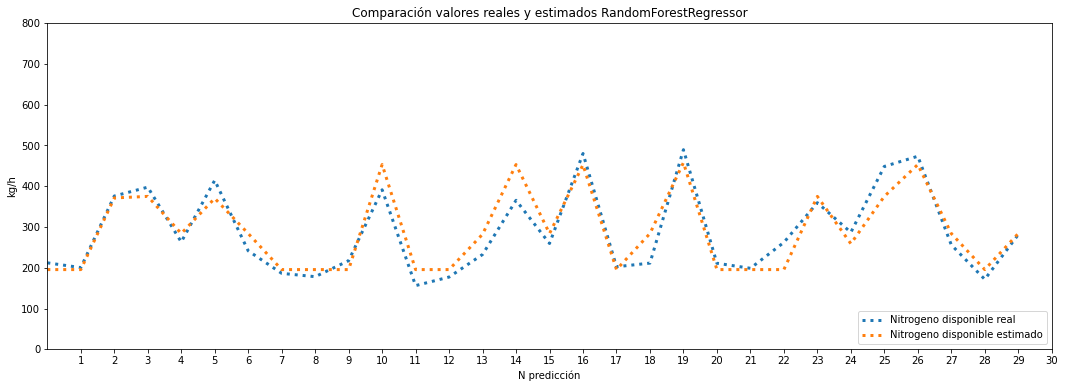

In [9]:

muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados RandomForestRegressor')
plt.legend(loc='lower right')
plt.show()

In [10]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

## Multi-layer Perceptron (MLP)

In [11]:

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
pred = regr.predict(X_test)



print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)




Mean Absolute Error (MAE): 2.2923330349856545
Mean Squared Error (MSE): 9.622466444871149
Root Mean Squared Error (RMSE): 3.1020100652433658
Mean Absolute Percentage Error (MAPE): 0.87
Accuracy: 99.13
R^2: 0.9991689808249041


0.9991689808249041

In [12]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

In [13]:
X_test.head()


,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,N,P,K,leaf_att,stem_att,store_att,SeasonLength
0,4.7,21,30,1.5,0.3,63.8,1.3,21.2,0.7,0.17,0.7,3810,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,230,130,130,3264.08034,3515.1441,3713.394876,240
1,5.7,21,20,1.7,0.3,67.5,4.9,29.2,0.7,0.17,0.7,4870,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,190,110,180,4172.19718,4493.1107,4139.659036,240
2,5.1,21,21,1.5,0.3,55.1,3.3,28.0,0.7,0.17,0.7,3090,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,550,80,310,2647.24626,2850.8649,3386.065776,240
3,5.9,21,25,0.3,0.3,90.6,6.4,3.9,0.7,0.17,0.7,4050,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,460,130,80,3469.69170,3736.5705,3815.710656,240
4,5.3,21,10,1.1,0.3,28.8,2.0,41.4,0.7,0.17,0.7,2960,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,410,130,50,2535.87344,2730.9256,3323.706320,240


In [14]:
y_test.head()

0    212.1
1    200.4
2    375.9
3    397.7
4    263.2
Name: N_supply, dtype: float64

In [15]:
#print(regr.predict([[5.1, 21, 1.5, 1.1, 3090, 550, 80, 310, 3386.065776]]))

In [16]:
#print(regr.predict([[5.5, 13, 0.9, 1.1, 4950, 410, 120, 180, 4169.140656]]))

In [17]:
X_test[0:1]

,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,N,P,K,leaf_att,stem_att,store_att,SeasonLength
0,4.7,21,30,1.5,0.3,63.8,1.3,21.2,0.7,0.17,0.7,3810,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,230,130,130,3264.08034,3515.1441,3713.394876,240


In [18]:
display(X_test.iloc[0])

PH                  4.700000
TEMP               21.000000
SOC                30.000000
KEX                 1.500000
PBRAY               0.300000
N_base_supply      63.800000
P_base_supply       1.300000
K_base_supply      21.200000
N_recovery          0.700000
P_recovery          0.170000
K_recovery          0.700000
NrTrees          3810.000000
NminStore           0.002800
NminVeg             0.045400
NmaxStore           0.004800
NmaxVeg             0.045900
PminStore           0.000380
PminVeg             0.003800
PmaxStore           0.000280
PmaxVeg             0.003000
KminStore           0.004500
KminVeg             0.003000
KmaxStore           0.006400
KmaxVeg             0.004000
N                 230.000000
P                 130.000000
K                 130.000000
leaf_att         3264.080340
stem_att         3515.144100
store_att        3713.394876
SeasonLength      240.000000
Name: 0, dtype: float64

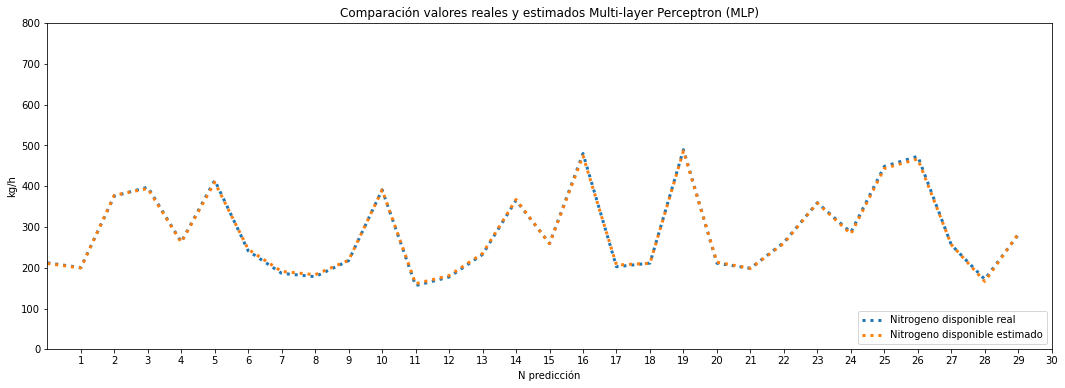

In [19]:

muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados Multi-layer Perceptron (MLP)')
plt.legend(loc='lower right')
plt.show()



##  BaggingRegressor

In [20]:
regr = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0).fit(X_train, y_train)

In [21]:


pred = regr.predict(X_test)


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)



Mean Absolute Error (MAE): 79.59552247798487
Mean Squared Error (MSE): 8872.600329882855
Root Mean Squared Error (RMSE): 94.19448141946987
Mean Absolute Percentage Error (MAPE): 29.65
Accuracy: 70.35
R^2: 0.2337410528436188


0.2337410528436188

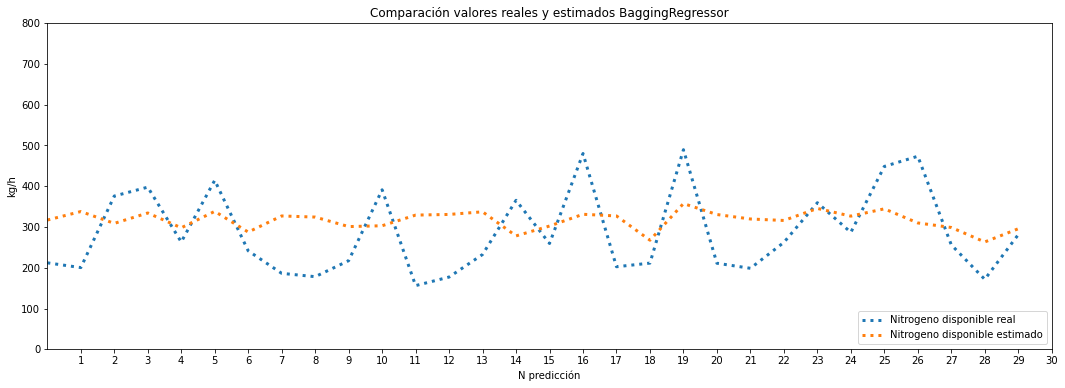

In [22]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados BaggingRegressor')
plt.legend(loc='lower right')
plt.show()


## DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(random_state=0)
regr = regressor.fit(X_train, y_train)

pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)

#cross_val_score(regressor, X_train, y_train, cv=20)

Mean Absolute Error (MAE): 5.235399999999999
Mean Squared Error (MSE): 61.937313333333336
Root Mean Squared Error (RMSE): 7.870026260015486
Mean Absolute Percentage Error (MAPE): 1.8
Accuracy: 98.2
R^2: 0.994650945749844


0.994650945749844

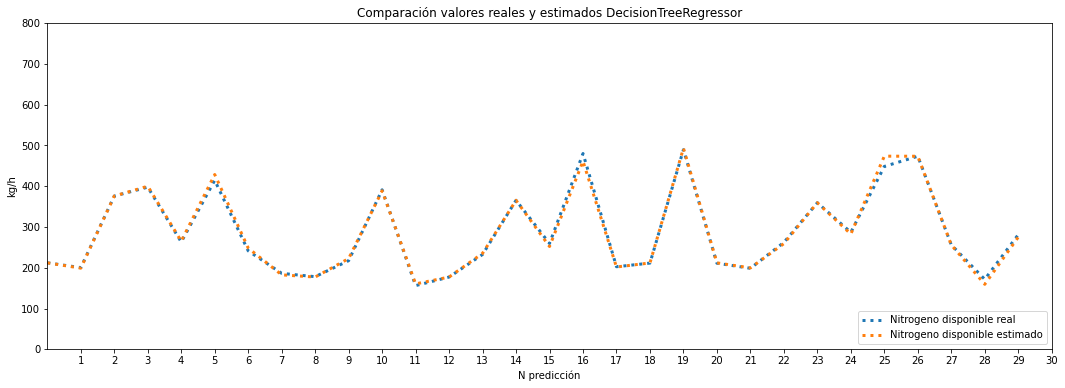

In [24]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados DecisionTreeRegressor')
plt.legend(loc='lower right')
plt.show()


## SVR


In [30]:
X_train

,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,N,P,K,leaf_att,stem_att,store_att,SeasonLength
10439,5.6,21,30,1.1,1.1,97.5,7.5,12.9,0.7,0.17,0.7,4490,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,510,120,320,3846.64586,4142.5189,3994.466926,240
9236,5.6,21,15,0.3,1.1,48.8,4.0,7.0,0.7,0.17,0.7,4080,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,190,60,230,3495.39312,3764.2488,3828.261280,240
818,5.6,21,16,1.3,1.1,52.0,4.2,28.6,0.7,0.17,0.7,3170,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,340,40,120,2715.78338,2924.6737,3423.945436,240
11504,5.1,21,32,0.5,1.1,84.0,5.3,6.1,0.7,0.17,0.7,3270,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,620,80,80,2801.45478,3016.9347,3470.764236,240
11722,5.6,21,9,0.3,1.1,29.3,2.6,11.7,0.7,0.17,0.7,4670,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,230,140,200,4000.85438,4308.5887,4064.303686,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,5.9,21,19,1.7,1.1,68.9,5.3,29.3,0.7,0.17,0.7,6350,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,310,90,130,5440.13390,5858.5735,4623.970906,240
3264,5.2,21,12,1.7,1.1,33.0,2.6,54.4,0.7,0.17,0.7,4860,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,530,10,140,4163.63004,4483.8846,4135.947295,240
9845,4.9,21,22,0.5,1.1,52.3,2.7,9.3,0.7,0.17,0.7,2520,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,500,90,90,2158.91928,2324.9772,3105.248080,240
10799,5.7,21,33,0.1,1.1,111.4,8.4,1.0,0.7,0.17,0.7,2570,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,560,120,150,2201.75498,2371.1077,3130.647886,240


In [31]:
y_train

10439    449.8
9236     175.6
818      251.2
11504    456.0
11722    189.5
         ...  
13123    265.1
3264     403.7
9845     303.3
10799    384.5
2732     376.6
Name: N_supply, Length: 10500, dtype: float64

In [32]:
X_test

,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,N,P,K,leaf_att,stem_att,store_att,SeasonLength
0,4.7,21,30,1.5,0.3,63.8,1.3,21.2,0.7,0.17,0.7,3810,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,230,130,130,3264.08034,3515.1441,3713.394876,240
1,5.7,21,20,1.7,0.3,67.5,4.9,29.2,0.7,0.17,0.7,4870,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,190,110,180,4172.19718,4493.1107,4139.659036,240
2,5.1,21,21,1.5,0.3,55.1,3.3,28.0,0.7,0.17,0.7,3090,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,550,80,310,2647.24626,2850.8649,3386.065776,240
3,5.9,21,25,0.3,0.3,90.6,6.4,3.9,0.7,0.17,0.7,4050,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,460,130,80,3469.69170,3736.5705,3815.710656,240
4,5.3,21,10,1.1,0.3,28.8,2.0,41.4,0.7,0.17,0.7,2960,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,410,130,50,2535.87344,2730.9256,3323.706320,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.9,21,12,0.3,0.3,43.5,3.1,8.2,0.7,0.17,0.7,3620,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,360,110,140,3101.30468,3339.8482,3629.985755,240
1496,5.3,21,27,1.3,0.3,77.6,5.2,18.1,0.7,0.17,0.7,2250,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,370,40,180,1927.60650,2075.8725,2965.541406,240
1497,4.9,21,29,1.5,0.3,68.9,3.0,21.1,0.7,0.17,0.7,2590,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,200,40,240,2218.88926,2389.5599,3140.766526,240
1498,4.9,21,31,1.7,0.3,73.6,3.2,22.4,0.7,0.17,0.7,2990,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,250,20,290,2561.57486,2758.6039,3338.185426,240


In [38]:
y_test

0       212.1
1       200.4
2       375.9
3       397.7
4       263.2
        ...  
1495    273.0
1496    234.8
1497    160.4
1498    208.4
1499    163.5
Name: N_supply, Length: 1500, dtype: float64

In [43]:
regr =  SVR(C=100, epsilon=0.1)
regr.fit(X_train, y_train)

SVR(C=100)

In [44]:
pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)


Mean Absolute Error (MAE): 3.5686886068580272
Mean Squared Error (MSE): 22.06381901337167
Root Mean Squared Error (RMSE): 4.697213962911597
Mean Absolute Percentage Error (MAPE): 1.2
Accuracy: 98.8
R^2: 0.9980945159142924


0.9980945159142924

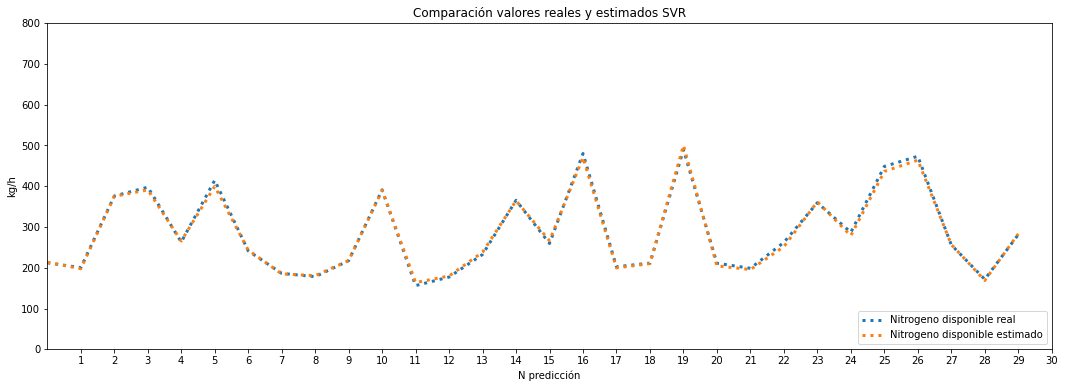

In [45]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados SVR')
plt.legend(loc='lower right')
plt.show()





In [46]:
pred.tolist()


[213.62094124264337,
 197.59362382973137,
 375.206500989867,
 391.1249779653258,
 265.622363472872,
 399.70092828071614,
 243.36296663961832,
 185.00856440168144,
 180.54760996418474,
 217.55477576435123,
 389.8836374240229,
 163.68017390377037,
 179.8869011603828,
 238.16809286593082,
 364.4864782008129,
 266.2487095146153,
 470.4393836914586,
 199.68879672616708,
 210.1727360237302,
 500.1388913366694,
 204.55655713463983,
 195.57155413713858,
 251.78268262788464,
 361.924446709957,
 278.75188069079144,
 436.22176193345103,
 463.996168077107,
 257.0797323892989,
 168.7606759963848,
 283.14219059791264,
 320.6786624028417,
 427.58262053348346,
 170.0972476743363,
 215.3749234773045,
 212.8553737141685,
 163.48892773253317,
 452.35710499134336,
 449.13841200021477,
 366.9877003629241,
 437.55324118123053,
 328.3446068590333,
 463.24450190172286,
 296.89623842906656,
 218.1660563097879,
 165.6634546095749,
 226.68961394400483,
 548.3314351039664,
 296.74150866117657,
 186.40551033755884